In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:/Users/vinig/OneDrive/Documentos/PdfDataExtraction/data/data.csv')

# splitting df to month and year, to make easier fill sep-23
df['data'] = pd.to_datetime(df['data'])
df['year'] = df['data'].dt.year
df['month'] = df['data'].dt.month

data_2023 = df[df['year'] == 2023]

# print to copare before-after 
print("DF before (Without sep-23 values):")
print(data_2023.groupby('data')['emplacados'].sum().reset_index())

missing_september = data_2023[~data_2023['modelo'].isin(data_2023[data_2023['month'] == 9]['modelo'])]['modelo'].unique()

DF before (Without sep-23 values):
         data  emplacados
0  2023-01-02      102856
1  2023-02-02       94659
2  2023-03-02      144318
3  2023-04-02      116665
4  2023-05-02      125936
5  2023-06-02      140636
6  2023-07-02      174674
7  2023-08-02      151547
8  2023-10-02      161083
9  2023-11-02      158239
10 2023-12-02      184007


In [2]:
# calculating the 2023 median for each model
median_sales = data_2023.groupby('modelo')['emplacados'].median()
september_data = data_2023[data_2023['modelo'].isin(missing_september)].drop_duplicates(subset=['modelo'])

# create the new Sep-23 df
september_data['emplacados'] = september_data['modelo'].apply(lambda model: round(median_sales[model]))
september_data['acumulado_anual'] = september_data.apply(lambda row: round(row['acumulado_anual'] + median_sales[row['modelo']]), axis=1)
september_data['data'] = pd.to_datetime('2023-09-02')

# merge with original df
df = pd.concat([df, september_data], ignore_index=True)

df['emplacados'] = df['emplacados'].round(0).astype(int)
df['acumulado_anual'] = df['acumulado_anual'].round(0).astype(int)
df = df.sort_values(by='data', ascending=True)

# Filter df for 2023
df_2023 = df[df['year'] == 2023]

print("DF after (With sep-23 values):")
print(df_2023.groupby('data')['emplacados'].sum().reset_index())

DF after (With sep-23 values):
         data  emplacados
0  2023-01-02      102856
1  2023-02-02       94659
2  2023-03-02      144318
3  2023-04-02      116665
4  2023-05-02      125936
5  2023-06-02      140636
6  2023-07-02      174674
7  2023-08-02      151547
8  2023-09-02      142651
9  2023-10-02      161083
10 2023-11-02      158239
11 2023-12-02      184007


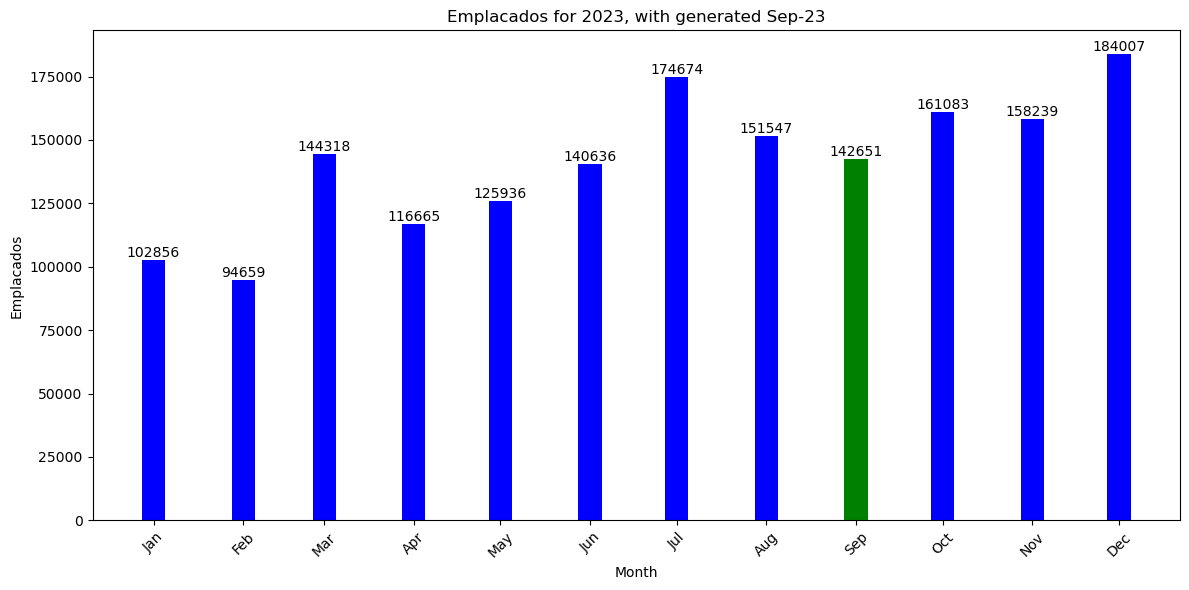

In [3]:
# agg emplacados by month
monthly_emplacados = df_2023.groupby(df_2023['data'].dt.to_period('M'))['emplacados'].sum()

# creating a plot to illustrate 
plt.figure(figsize=(12, 6))

months = monthly_emplacados.index.to_timestamp()
values = monthly_emplacados.values
colors = ['blue' if month.month != 9 else 'green' for month in months]

bars = plt.bar(months, values, color=colors, width=8, align='center')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10, color='black')

plt.bar(months, values, color=colors, width=8, align='center')
plt.xlabel('Month')
plt.ylabel('Emplacados')
plt.title('Emplacados for 2023, with generated Sep-23')
plt.xticks(ticks=months, labels=[month.strftime('%b') for month in months], rotation=45)
plt.tight_layout()

plt.show()

In [7]:
print(df)

#.csv Save
csv_filepath =fr'C:/Users/vinig/OneDrive/Documentos/PdfDataExtraction/data/datapreforecast.csv'

df.to_csv(csv_filepath, index=False, encoding='ISO-8859-1')

print(f'datapreforecast.csv saved to {csv_filepath}')

       marca     modelo  emplacados  acumulado_anual       data  year  month
3932   HONDA      CIVIC        1133             1133 2022-01-02  2022      1
3925      GM  ONIX_PLUS        3431             3431 2022-01-02  2022      1
3926   HONDA       CITY        1011             1011 2022-01-02  2022      1
3927  NISSAN      VERSA         794              794 2022-01-02  2022      1
3928      VW     VIRTUS         612              612 2022-01-02  2022      1
...      ...        ...         ...              ...        ...   ...    ...
808   NISSAN      VERSA        1327             7277 2024-07-02  2024      7
807    HONDA       CITY        1701             7901 2024-07-02  2024      7
805       VW     VIRTUS        2906            17892 2024-07-02  2024      7
820      BMW       420I           8               72 2024-07-02  2024      7
779       VW       POLO       12543            70405 2024-07-02  2024      7

[4196 rows x 7 columns]
datapreforecast.csv saved to C:/Users/vinig/OneDriv